In [1]:
import numpy as np
import pandas as pd
#import seaborn as sb #Could not use it
import math
import numbers
from functools import reduce
import pretty_notebook #Functions for tyding our data
import data_science_functions as dsf
import radar_chart as rc

# Introduction


In the last few years speed dating popularity has grown quickly. Despite its popularity lots of people don't seem as satisfied as they'd like. Most users don't end up finding what they were looking for. That's why a crew of data scientists is going to study data on previous speed dating events in order to make it easier for our users to find their other halves.

**Disclaimer:** Most of the data has been recorded from heterosexual encounters this makes it difficult to inferentiate the data into our system. *(New Speed Dating events are more plural taking into account all sexs and genders)*

# What are we looking for?

### Finding questions

The first thing we have to do is ask ourselfs what conclusions we hope this study leads to. In other words finding the questions this project is going to answer to.

First of all we want to maximize the likelyhood two people fall in love.

>**"Are these two people going to match?"** - *(After selecting two people from a new wave)*

Secondly we want to be able to group people in order to choose them for special waves

>**"Which group does someone correspond to?"** - *(After selecting two people from a new wave)*

"Speed Dating" data tidying
-----
The first thing to do is fix possible errors so that it is easier to approach the solution.

In [2]:
speedDatingDF = pd.read_csv("Speed Dating Data.csv",encoding = "ISO-8859-1")
#speedDatingDF.dtypes #We can see which type has each attr.

Every variable is described in the piece of writing called ***"Speed Dating Data.doc"*** which is in the same directory as this notebook.

And in cases such as gender or race we can see using numbers is not the best choice. That's why we are going to modify those variables which are not countable.

**All this changes were done after the reading of *"The elements of data analytic style"* as recommended in the course webpage**

### Tyding choice

As most of the things done when data tyding do not involve any programming skills I have prefered to put them into a black box where they don't disturb the eye of a real programmer.

The processing is inside de function *tidy_this_data* of the python file called **pretty_notebook.py** which is in the same repository as this project.

In [3]:
speedDatingDF = pretty_notebook.tidy_this_data(speedDatingDF)

### Evaluating our changes

With regards to the tidying process, a warrant of correct processing is needed. Looking into the issue two big problems appear.

**The first problem is:**

> People didn't finish their evaluation and a lot of **NAN** values can be found in the last variables of the data frame.

In [4]:
#This same behaviour can be seen in most of the last attributes of feedback
print ( pretty_notebook.values_in_a_column(speedDatingDF.met) ) 

[False, True, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 3.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.0, 8.0, 6.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

As the author thinks the problem in this case is that people could not be followed up, we will simply ignore most of the data.

**The second problem is:**

> People entered wrong values and this were transcribed into the dataframe.

In [5]:
#Taking the same column and looking at the values different from NAN  an error appears.
values = pretty_notebook.values_in_a_column(speedDatingDF.met)
values = [v for v in values if not np.isnan(v)]
print (values) #True and False are not the unique values

[False, True, 3.0, 5.0, 7.0, 8.0, 6.0]


For *uncountable* variables this last error is an error only found in the **met** variable so it is not a big issue but it must be taken into account afterwards when the variables representing a *percentage* come into stage.

The correction is changing this values for **True** as the author of the study supposes people wanted to say they had met their pair more than once.

In [6]:
for v in values[2:]: #correction done HERE !!!
    speedDatingDF.loc[speedDatingDF['met'] == v, 'met'] = True

#We evaluate if the changes are right
values = pretty_notebook.values_in_a_column(speedDatingDF.met)
values = [v for v in values if not np.isnan(v)]
print (values) #True and False ARE the UNIQUE values

[False, True]


### Countable data

Now it is the time for data that can be evaluated in order to tidy the data some plots will be done to fix possible problems on data scale or distribution.

For instance we know data from different waves has different interval values, that's why we are going to let each element between 0 and 1:

In [7]:
pretty_notebook.normalize_data(speedDatingDF)

In [8]:
eachWave = speedDatingDF.groupby('wave')

eachWave.get_group(7).iloc[0:10,69:75]

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
1896,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1897,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1898,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1899,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1900,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1901,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1902,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1903,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1904,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952
1905,0.1429,0.1429,0.2143,0.2143,0.1905,0.0952


And for other waves, where the range of values was different, we also have numbers between 0 and 1:

In [9]:
eachWave.get_group(8).iloc[0:10,69:75]

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
2408,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2409,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2410,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2411,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2412,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2413,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2414,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2415,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2416,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667
2417,0.0952,0.2381,0.1667,0.1667,0.1667,0.1667


In the end we have achieved a pretty normalised dataset. Now it's the turn for the science to begin.

In [10]:
# SAVING DATA IN ORDER TO SAVE TIME
speedDatingDF.to_csv('cleanDATAFRAME.csv',index=False)

In [11]:
#IF YOU TRUST MY CLEANING PROCESS
speedDatingDF = pd.read_csv('cleanDATAFRAME.csv')

# Data analysis

After having tidied our data we will use some of the tools we have developed within the semester to evaluate if two people are going to match.

We have chosen to show how cross validation ameliorates the result. We will first use a technique which does not guarantee cross validation and then cross-validation. That means, we will train several Machine Learning objects and afterwards they will only influence those points they do not know.

In [12]:
labels  = []
for boolean in speedDatingDF.match:
    if boolean:
        labels.append(1)
    else:
        labels.append(-1)

In [13]:
labels = np.array(labels) #If someone got match 1 else -1
the_set = dsf.LabeledSet(6) #We will fill it with the impression he causes and the things each one likes
values = np.array(speedDatingDF.iloc[0:,69:75]) #What the person asked looks for

In [14]:
for i in range(len(values)):
    value = values[i]
    label = labels[i]
    the_set.addExample(value,label)

In [15]:
foret = dsf.ClassifierBaggingTree(5,0.3,0.7,True)
foret.train(the_set)

In [16]:
print("Bagging of decision trees (5 trees): accuracy totale: data=%.4f "%(foret.accuracy(the_set)))

Bagging of decision trees (5 trees): accuracy totale: data=0.8353 


In [17]:
perceps = dsf.ClassifierOOBPerceptron(5,0.3,0.0,True)
perceps.train(the_set)

In [18]:
print("Out of the bag with perceptrons (5 perceptrons): accuracy totale: data=%.4f "%(perceps.accuracy(the_set)))

/Users/Diario/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


Out of the bag with perceptrons (5 perceptrons): accuracy totale: data=0.8353 


In [19]:
foretOOB = dsf.ClassifierOOBTree(5,0.3,0.7,True)
foretOOB.train(the_set)

In [20]:
print("Out of the bag with trees (5 trees): accuracy totale: data=%.4f "%(foretOOB.accuracy(the_set)))

/Users/Diario/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


Out of the bag with trees (5 trees): accuracy totale: data=0.8353 


### Answering to the 2nd question

We want to visualize groups in orther to create events where people have more affinity.

A way of visualizing this is by a radar chart.

In [21]:
measure_up, l_aff = dsf.kmoyennes(3, speedDatingDF.iloc[0:,24:30].dropna(axis=0), 0.05, 100)
looking_for, l_aff = dsf.kmoyennes(3, speedDatingDF.iloc[0:,69:75].dropna(axis=0), 0.05, 100)
others_looking_for, l_aff = dsf.kmoyennes(3, speedDatingDF.iloc[0:,75:81].dropna(axis=0), 0.05, 100)
possible_pair, l_aff = dsf.kmoyennes(3, speedDatingDF.iloc[0:,81:87].dropna(axis=0), 0.05, 100)

In [22]:
data = [
        ['attractive', 'sincere', 'intelligent','funny','ambitious','hobbies'],
        ('The surveyed measure up',np.array(measure_up)),
        ('The surveyed is looking for:',np.array(looking_for)),
        ('The surveyed thinks others are looking for:',np.array(others_looking_for)),
        ('Possible matches are looking for:',np.array(possible_pair))
       ]

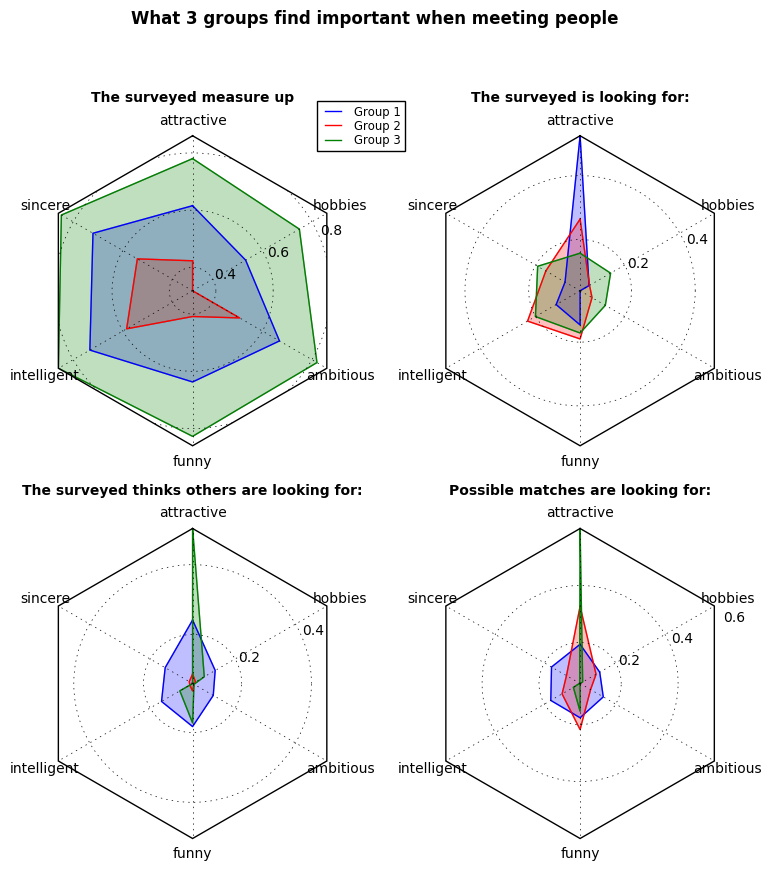

In [23]:
rc.print_rc(data,3)

If we interpret this graph this leads to astonishing results. People are really ideallistic when thinking of others this leads to models where attractiveness is really important while in the end people are pretty normal. 

# Conclusion

This project has two main objectives a descriptive one which is being able to place people into groups (K-means) but also a predictive one which is being able to predict a match. Both purposes are strictly linked with the data analysis main goals.  

With little information we can tell if two people are going to match with an accuracy of around 80%. The question is what can Tinder do?